<a href="https://colab.research.google.com/github/manashpratim/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Downloading the dataset
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/30764/39238/Sarcasm_Headlines_Dataset.json.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561457285&Signature=iF0OFX3Y7%2FsA%2Frg2BhTIlg%2FfAu%2BsxT4cQnOAI%2BthZFO2iltMdBQop0TBuE1QRrN4n8J6jBi235F81nf6CJ%2FFkx7Fx3mc4o2imDoRIK%2FPGC6Go4B8pyf9W3McsglpUVfkWRO8RX3zeKUZmbUkd9aP0WoMbrYo2kF0Fw5FaOBjjWnfJZjk3UPqME4U7b2KB08e%2BQknBMBLFkOE65TtZEHWa056gI2JoE37riXx0G6qjyypiPTmjePahOUE4EtPbDRUp2vukU%2FHEp%2Bh%2BNI9yx%2FruiTKufvD%2FdhMO87AjW3esGFwr41fGNlKrFihOcPSzi0%2FiyEAAH%2F8My7X43G777Vijw%3D%3D"\
      -O "/tmp/sarcasm.zip"

--2019-06-23 06:02:59--  https://storage.googleapis.com/kaggle-datasets/30764/39238/Sarcasm_Headlines_Dataset.json.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561457285&Signature=iF0OFX3Y7%2FsA%2Frg2BhTIlg%2FfAu%2BsxT4cQnOAI%2BthZFO2iltMdBQop0TBuE1QRrN4n8J6jBi235F81nf6CJ%2FFkx7Fx3mc4o2imDoRIK%2FPGC6Go4B8pyf9W3McsglpUVfkWRO8RX3zeKUZmbUkd9aP0WoMbrYo2kF0Fw5FaOBjjWnfJZjk3UPqME4U7b2KB08e%2BQknBMBLFkOE65TtZEHWa056gI2JoE37riXx0G6qjyypiPTmjePahOUE4EtPbDRUp2vukU%2FHEp%2Bh%2BNI9yx%2FruiTKufvD%2FdhMO87AjW3esGFwr41fGNlKrFihOcPSzi0%2FiyEAAH%2F8My7X43G777Vijw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1670880 (1.6M) [application/zip]
Saving to: ‘/tmp/sarcasm.zip’

/tmp/sarcasm.zip    100%[===================>]   1.59M  --.-KB/s    in 0.01s   

2019-06-23 06:02:

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/sarcasm.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/sarcasm')
zip_ref.close()

In [0]:
#Opening the json file
import json
rows = []
for line in open('/tmp/sarcasm/Sarcasm_Headlines_Dataset.json', 'r'):
    rows.append(json.loads(line))

In [0]:
#Suffling the data and splitting the data into training and test sets 
import random
SPLIT_SIZE=0.9
suffled_set=random.sample(rows,len(rows))
train_length=int(len(suffled_set)*SPLIT_SIZE)
train_set=suffled_set[:train_length]
test_set=suffled_set[train_length:]

In [0]:
#Data Summary
print('Total length of the dataset: ',len(suffled_set))
print('Length of the Training dataset: ',len(train_set))
print('Length of the Test dataset: ',len(test_set))

Total length of the dataset:  26709
Length of the Training dataset:  24038
Length of the Test dataset:  2671


In [0]:
#Data Format
train_set[1000]

{'article_link': 'https://www.huffingtonpost.com/entry/abandoned-places-around-the-world-photos_us_562a70fce4b0aac0b8fccfef',
 'headline': 'these photos of abandoned places around the world are real creepy',
 'is_sarcastic': 0}

In [0]:
#This list is available at https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords=[ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [0]:
#Function to remove stopwords
def remove_stopwords(sentence):
  for word in stopwords:
    token=' '+word+' '
    sentence=sentence.replace(token,' ')
    sentence=sentence.replace('  ',' ')
  return sentence

In [0]:
#Function to get the plain text from the link of an article
def get_article(link):
  try:
    from bs4 import BeautifulSoup
    import urllib.request

    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

    url = link

    headers={'User-Agent':user_agent,} 

    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    html= response.read()
    soup = BeautifulSoup(html)

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return ' '.join(text.split())
  except:
    return 'article not available'
    pass
  
 

In [0]:
#Function to separate the articles, headlines and labels from the data
def extract(array):
  
  #articles=[]
  headlines=[]
  labels=[]
  for i in range(len(array)):
    labels.append(array[i]['is_sarcastic'])
    headlines.append(remove_stopwords(array[i]['headline']))
    #articles.append(get_article(array[i]['article_link']))
  #return articles,headlines,labels
  return headlines,labels

In [0]:
#Extracting articles, headlines and labels from the data
#train_articles,train_headlines,train_labels=extract(train_set)
train_headlines,train_labels=extract(train_set)
#test_articles,test_headlines,test_labels=extract(test_set)
test_headlines,test_labels=extract(test_set)

In [0]:
#Preprocessing the training and test headlines for the word embedding
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_headlines)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences,maxlen=max_length)


# **CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [0]:
#Building the CNN Model
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [0]:
model_conv.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 118, 16)           784       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 59, 16)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 944)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 5670      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 166,461
Trainable params: 166,461
Non-trainable params: 0
_______________________________________________

In [0]:
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history=model_conv.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

Train on 24038 samples, validate on 2671 samples
Epoch 1/20
24038/24038 [==============================] - 4s 182us/sample - loss: 0.5161 - acc: 0.7135 - val_loss: 0.3822 - val_acc: 0.8165
Epoch 2/20
24038/24038 [==============================] - 3s 115us/sample - loss: 0.2645 - acc: 0.8911 - val_loss: 0.3711 - val_acc: 0.8225
Epoch 3/20
24038/24038 [==============================] - 3s 117us/sample - loss: 0.1631 - acc: 0.9394 - val_loss: 0.4183 - val_acc: 0.8304
Epoch 4/20
24038/24038 [==============================] - 3s 117us/sample - loss: 0.0936 - acc: 0.9694 - val_loss: 0.5168 - val_acc: 0.8222
Epoch 5/20
24038/24038 [==============================] - 3s 116us/sample - loss: 0.0497 - acc: 0.9857 - val_loss: 0.6177 - val_acc: 0.8210
Epoch 6/20
24038/24038 [==============================] - 3s 116us/sample - loss: 0.0252 - acc: 0.9941 - val_loss: 0.7077 - val_acc: 0.8147
Epoch 7/20
24038/24038 [==============================] - 3s 117us/sample - loss: 0.0128 - acc: 0.9969 - val_lo

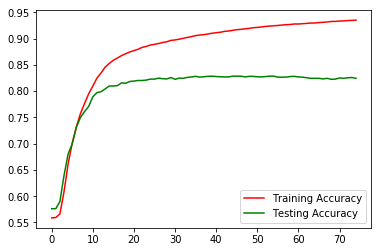

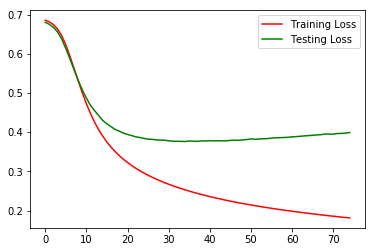

In [0]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# **Bidirectional GATED RECURRENT UNIT (GRU)**

In [0]:
#Building the GRU Model
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [0]:
model_gru.summary() 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32)                3168      
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 163,373
Trainable params: 163,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history1=model_gru.fit(padded, train_labels, batch_size=1000,epochs=num_epochs, validation_data=(test_padded, test_labels))

Train on 24038 samples, validate on 2671 samples
Epoch 1/20
24038/24038 [==============================] - 11s 456us/sample - loss: 0.6926 - acc: 0.5488 - val_loss: 0.6914 - val_acc: 0.5762
Epoch 2/20
24038/24038 [==============================] - 9s 382us/sample - loss: 0.6913 - acc: 0.5594 - val_loss: 0.6900 - val_acc: 0.5762
Epoch 3/20
24038/24038 [==============================] - 9s 380us/sample - loss: 0.6901 - acc: 0.5594 - val_loss: 0.6883 - val_acc: 0.5758
Epoch 4/20
24038/24038 [==============================] - 9s 377us/sample - loss: 0.6836 - acc: 0.6404 - val_loss: 0.6746 - val_acc: 0.6799
Epoch 5/20
24038/24038 [==============================] - 9s 380us/sample - loss: 0.6278 - acc: 0.7402 - val_loss: 0.5915 - val_acc: 0.7488
Epoch 6/20
24038/24038 [==============================] - 9s 378us/sample - loss: 0.5254 - acc: 0.8512 - val_loss: 0.5869 - val_acc: 0.7495
Epoch 7/20
24038/24038 [==============================] - 9s 386us/sample - loss: 0.4708 - acc: 0.8769 - val_l

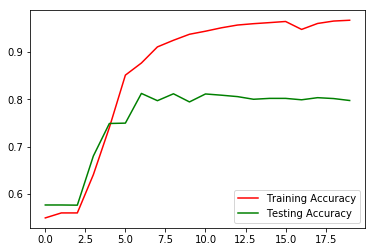

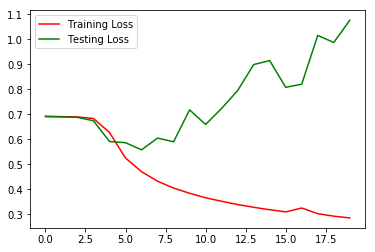

In [0]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['acc']
val_acc=history1.history['val_acc']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# **Bidirectional LONG SHORT TERM MEMORY (LSTM)**

In [0]:
#Building the LSTM Model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [0]:
model_lstm.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 164,429
Trainable params: 164,429
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history2=model_lstm.fit(padded, train_labels, batch_size=1000,epochs=num_epochs, validation_data=(test_padded, test_labels))

Train on 24038 samples, validate on 2671 samples
Epoch 1/20
24038/24038 [==============================] - 13s 540us/sample - loss: 0.6883 - acc: 0.5555 - val_loss: 0.6802 - val_acc: 0.5762
Epoch 2/20
24038/24038 [==============================] - 11s 443us/sample - loss: 0.6808 - acc: 0.5594 - val_loss: 0.6707 - val_acc: 0.5762
Epoch 3/20
24038/24038 [==============================] - 11s 448us/sample - loss: 0.6505 - acc: 0.5594 - val_loss: 0.6203 - val_acc: 0.5766
Epoch 4/20
24038/24038 [==============================] - 11s 452us/sample - loss: 0.5706 - acc: 0.6706 - val_loss: 0.5504 - val_acc: 0.7754
Epoch 5/20
24038/24038 [==============================] - 11s 453us/sample - loss: 0.4714 - acc: 0.8223 - val_loss: 0.4722 - val_acc: 0.8068
Epoch 6/20
24038/24038 [==============================] - 11s 447us/sample - loss: 0.3551 - acc: 0.8843 - val_loss: 0.3996 - val_acc: 0.8259
Epoch 7/20
24038/24038 [==============================] - 10s 435us/sample - loss: 0.2733 - acc: 0.9034 -

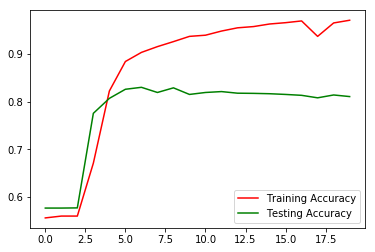

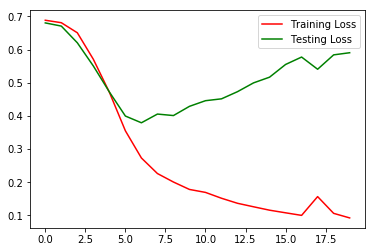

In [0]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()